In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import time

In [3]:
data = pd.read_csv('covid_province.csv')

In [4]:
data.head()

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,64084,2346,15343
1,Guangdong,1342,6,755
2,Henan,1271,19,868
3,Zhejiang,1205,1,760
4,Hunan,1016,4,714


In [5]:
del data['Province/State']
data = data.iloc[1:]

In [6]:
data.head()

,Confirmed,Deaths,Recovered
1,1342,6,755
2,1271,19,868
3,1205,1,760
4,1016,4,714
5,989,6,637


In [7]:
confirmed = np.array(data['Confirmed'])
death = np.array(data['Deaths'])
recovered = np.array(data['Recovered'])

In [8]:
type(death)

numpy.ndarray

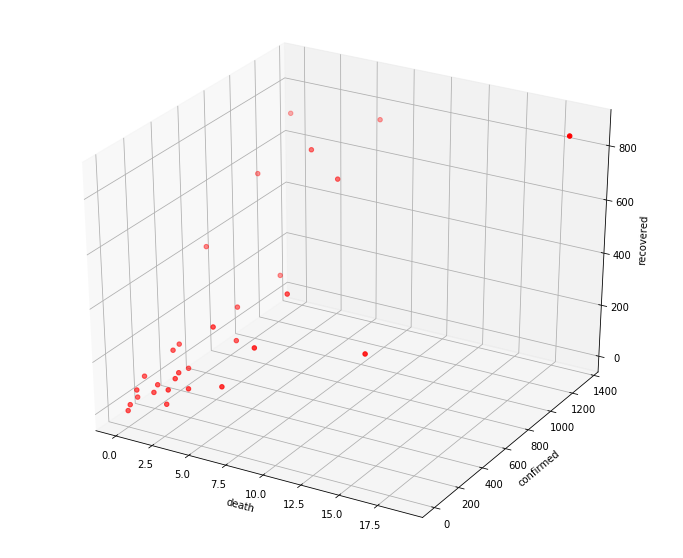

In [9]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(death,confirmed,recovered, c='r', marker='o')
ax.set_xlabel('death')
ax.set_ylabel('confirmed')
ax.set_zlabel('recovered')
plt.show()

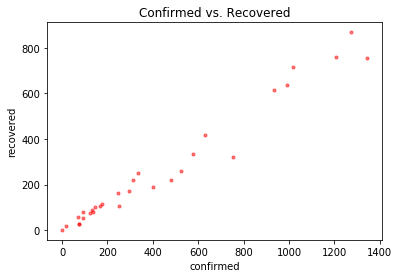

In [10]:
plt.scatter(confirmed, recovered, s=np.pi*3, c='r', alpha=0.5)
plt.title('Confirmed vs. Recovered')
plt.xlabel('confirmed')
plt.ylabel('recovered')
plt.show()

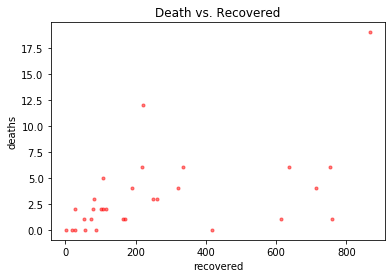

In [11]:
plt.scatter(recovered, death, s=np.pi*3, c='r', alpha=0.5)
plt.title('Death vs. Recovered')
plt.xlabel('recovered')
plt.ylabel('deaths')
#plt.xticks(np.arange(min(death), max(death)+1, 1.0))
plt.show()

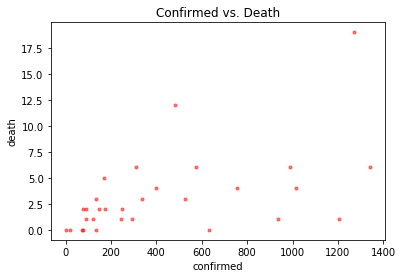

In [12]:
plt.scatter(confirmed, death, s=np.pi*3, c='r', alpha=0.5)
plt.title('Confirmed vs. Death')
plt.xlabel('confirmed')
plt.ylabel('death')
plt.show()

In [13]:
import seaborn as sb

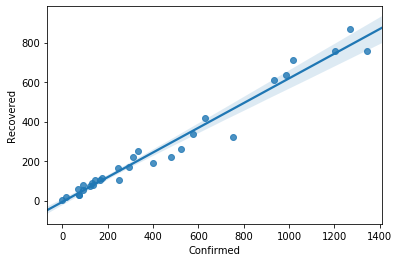

In [14]:
sb.regplot(x="Confirmed", y="Recovered", data=data)

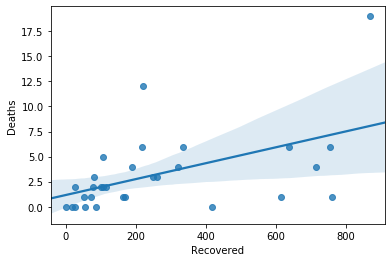

In [15]:
sb.regplot(x="Recovered", y="Deaths", data=data)

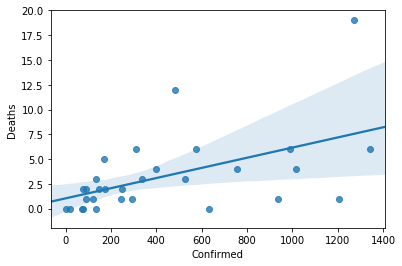

In [16]:
sb.regplot(x="Confirmed", y="Deaths", data=data)

In [17]:
#clustring

In [18]:
from sklearn.cluster import KMeans

In [19]:
DR = []
CD = []
temp = []
for i in range(death.size):
    temp = [recovered[i],death[i]]
    DR.append(temp)
for i in range(death.size):
    temp = [confirmed[i],death[i]]
    CD.append(temp)
type(CD)

list

In [20]:
DR = np.array(DR)
CD = np.array(CD)
type(DR)

numpy.ndarray

In [22]:
#death & recovered
DR_kmeans = KMeans(n_clusters=3)
DR_kmeans.fit(DR)
y_DR_kmeans = DR_kmeans.predict(DR)

numpy.ndarray

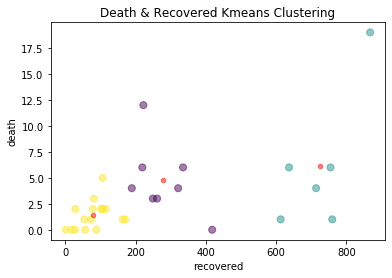

In [56]:
plt.scatter(DR[:, 0], DR[:, 1], c=y_DR_kmeans, s=50, cmap='viridis',alpha=0.5)

DR_centers = DR_kmeans.cluster_centers_
plt.title('Death & Recovered Kmeans Clustering')
plt.xlabel('recovered')
plt.ylabel('death')
plt.scatter(DR_centers[:, 0], DR_centers[:, 1], c='red', s=20, alpha=0.5)

In [50]:
#confirmed & death
CD_kmeans = KMeans(n_clusters=3)
CD_kmeans.fit(CD)
y_CD_kmeans = CD_kmeans.predict(CD)

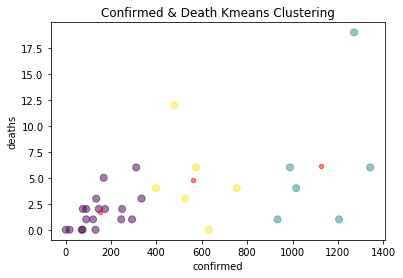

In [51]:
plt.scatter(CD[:, 0], CD[:, 1], c=y_CD_kmeans, s=50, cmap='viridis',alpha = 0.5)

CD_centers = CD_kmeans.cluster_centers_
plt.title('Confirmed & Death Kmeans Clustering')
plt.xlabel('confirmed')
plt.ylabel('deaths')
plt.scatter(CD_centers[:, 0], CD_centers[:, 1], c='red', s=20, alpha=0.5)

In [52]:
temp = []
ThreeD = []
for i in range(death.size):
    temp = [confirmed[i],recovered[i],death[i]]
    ThreeD.append(temp)
ThreeD = np.array(ThreeD)

In [53]:
ThreeD_kmeans = KMeans(n_clusters=4)
ThreeD_kmeans.fit(ThreeD)
y_ThreeD_kmeans = ThreeD_kmeans.predict(ThreeD)

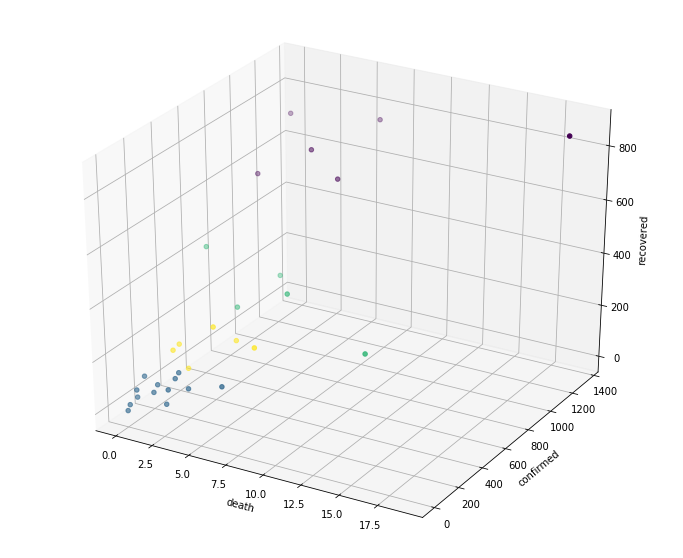

In [54]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(death,confirmed,recovered, c=y_ThreeD_kmeans, marker='o')
ax.set_xlabel('death')
ax.set_ylabel('confirmed')
ax.set_zlabel('recovered')
plt.show()